In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Used Car Dataset.csv', header=0)
df

,Make,Model,Year,Price,Mileage
0,Nissan,Murano,2018,28177,63971
1,Nissan,Maxima,2021,40981,2148
2,Nissan,Pathfinder,2018,30155,43551
3,Nissan,Murano,2019,28999,7623
4,Nissan,Murano,2017,26999,41029
5,Nissan,Murano,2018,28177,63971
6,Nissan,Pathfinder,2018,23249,46115
7,Nissan,Pathfinder,2020,26499,48443
8,Nissan,Murano,2018,27499,36575
9,Nissan,Murano,2020,39554,4781


In [5]:
#perform descriptive statistics to understand the data - should be the first thing for any project
#number of data points, min, max, median, outliers - (boxplot)
len(df)

20

In [10]:
my_min = df['Price'].loc[df['Price'].idxmin()]
my_min

22499

In [12]:
my_max = df['Price'].loc[df['Price'].idxmax()]
my_max

40981

In [14]:
#convert Strings to Integers
df['Price'] = pd.to_numeric(df['Price'])
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [20]:
df1 = pd.DataFrame({"Date" : ['2021-10-09', '2021-10-08', '2021-08-07']})

In [22]:
#convert date time object
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d')
df1['Date']

0   2021-10-09
1   2021-10-08
2   2021-08-07
Name: Date, dtype: datetime64[ns]

In [24]:
df2 = pd.DataFrame({"Date" : ['10-09-2021', '9-8-2021', '8-7-2021']})
df2['Date'] = pd.to_datetime(df2['Date'], format='%m-%d-%Y')
df2

,Date
0,2021-10-09
1,2021-09-08
2,2021-08-07


In [26]:
df['Year_Dt'] = pd.to_datetime(df['Year'], format='%Y')

In [27]:
df.max()

Make                    Nissan
Model               Pathfinder
Year                      2021
Price                    40981
Mileage                  63971
Year_Dt    2021-01-01 00:00:00
dtype: object

In [29]:
df.loc[:, ['Year', 'Price', 'Mileage']].max() - df.loc[:,['Year', 'Price', 'Mileage']].min()

Year           4
Price      18482
Mileage    61823
dtype: int64

In [30]:
model_counts = df['Model'].value_counts()
model_counts

Murano        11
Pathfinder     7
Maxima         2
Name: Model, dtype: int64

Text(0.5, 1.0, 'Model')

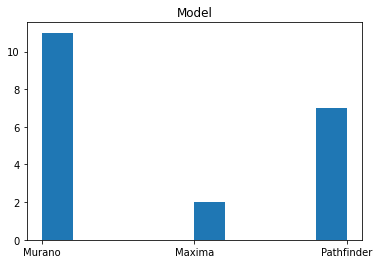

In [32]:
fig = plt.figure()
ax = plt.axes()
ax.hist(df['Model'])
ax.set_title('Model')

In [33]:
plt.close()

Text(0.5, 1.0, 'Make')

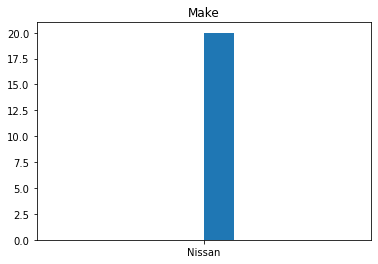

In [34]:
fig = plt.figure()
ax = plt.axes()
ax.hist(df['Make'])
ax.set_title('Make')

Text(0.5, 1.0, 'Price ($)')

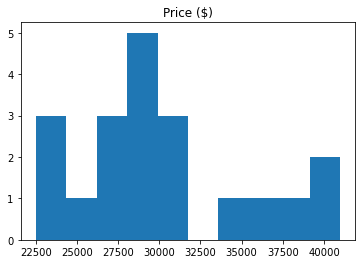

In [36]:
fig = plt.figure()
ax = plt.axes()
ax.hist(df['Price'])
ax.set_title('Price ($)')

Text(0.5, 1.0, 'Year')

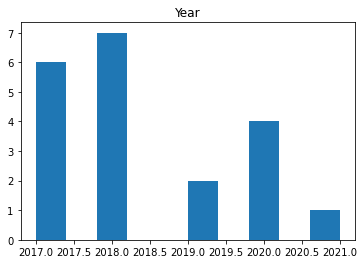

In [37]:
fig = plt.figure()
ax = plt.axes()
ax.hist(df['Year'])
ax.set_title('Year')

In [38]:
plt.close()

Text(0.5, 1.0, 'Price Dispersion')

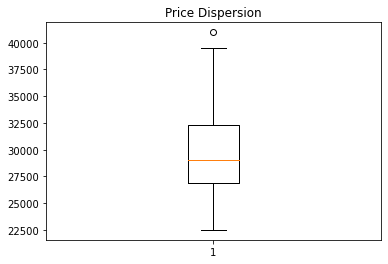

In [39]:
fig = plt.figure()
ax = plt.axes()
ax.boxplot(df['Price'])
ax.set_title('Price Dispersion')

Text(0.5, 1.0, 'Mileage Dispersion')

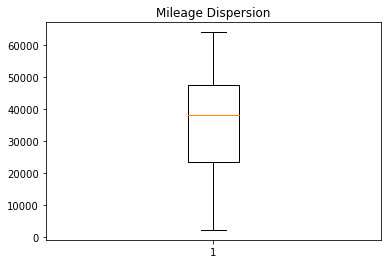

In [40]:
fig = plt.figure()
ax = plt.axes()
ax.boxplot(df['Mileage'])
ax.set_title('Mileage Dispersion')

In [41]:
plt.close()

Text(0, 0.5, 'Price')

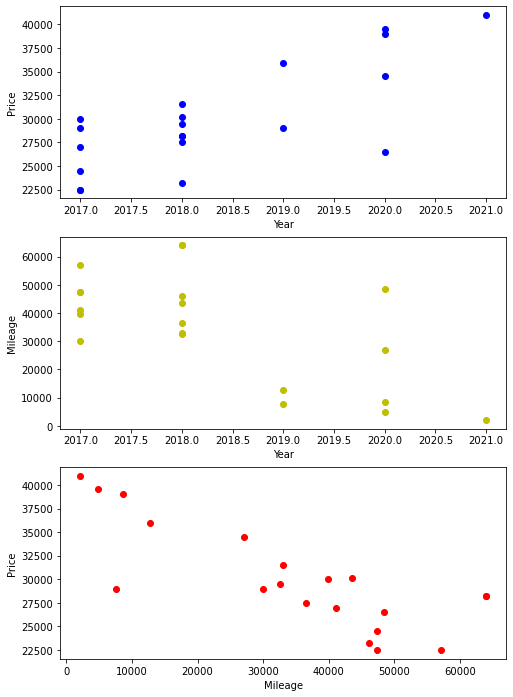

In [44]:
fig = plt.figure(figsize=[8,12])
ax = fig.subplots(3,1)
ax[0].scatter(df['Year'], df['Price'],color='b')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Price')

ax[1].scatter(df['Year'], df['Mileage'],color='y')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Mileage')

ax[2].scatter(df['Mileage'], df['Price'],color='r')
ax[2].set_xlabel('Mileage')
ax[2].set_ylabel('Price')

In [45]:
plt.close()

In [47]:
correlation1 = df['Year'].corr(df['Price'])
correlation1

0.7675369890321593

In [48]:
correlation2 = df['Year'].corr(df['Mileage'])
correlation2

-0.6532625920110233

In [49]:
correlation3 = df['Mileage'].corr(df['Price'])
correlation3

-0.7998550637870337

In [50]:
df['Mileage'].groupby(df['Model']).mean()

Model
Maxima        29580.000000
Murano        29900.272727
Pathfinder    43669.000000
Name: Mileage, dtype: float64

In [51]:
df['Mileage'].groupby(df['Model']).mean().sort_values(ascending=False)

Model
Pathfinder    43669.000000
Murano        29900.272727
Maxima        29580.000000
Name: Mileage, dtype: float64